<a href="https://colab.research.google.com/github/pallavi-vishnu/NetflixTitles/blob/main/Netflix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [55]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

In [56]:
# Read the csv file
raw_data = pd.read_csv('netflix_titles.csv')

In [57]:
raw_data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [58]:
# Get the information about the columns and their datatypes

raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [59]:
# Make a copy of the original dataframe
netflix_titles = raw_data.copy()

In [60]:
#  What are the unique types of titles

netflix_titles['type'].unique()

array(['Movie', 'TV Show'], dtype=object)

In [61]:
# There are only two types of titles. Converting it into categories will save some space

netflix_titles['type'] = netflix_titles['type'].astype('category')

In [62]:
netflix_titles['country'] = netflix_titles['country'].str.split(',')
netflix_titles['country'].value_counts()

country
[United States]                                2818
[India]                                         972
[United Kingdom]                                419
[Japan]                                         245
[South Korea]                                   199
                                               ... 
[Romania,  Bulgaria,  Hungary]                    1
[Uruguay,  Guatemala]                             1
[France,  Senegal,  Belgium]                      1
[Mexico,  United States,  Spain,  Colombia]       1
[United Arab Emirates,  Jordan]                   1
Name: count, Length: 748, dtype: int64

In [63]:
# seperate each word in each row of the column country
netflix_titles = netflix_titles.explode('country')
netflix_titles['country'] = netflix_titles['country'].str.lstrip(' ')

Countries = netflix_titles['country'].value_counts().head(10)

Countries

country
United States     3690
India             1046
United Kingdom     806
Canada             445
France             393
Japan              318
Spain              232
South Korea        231
Germany            226
Mexico             169
Name: count, dtype: int64

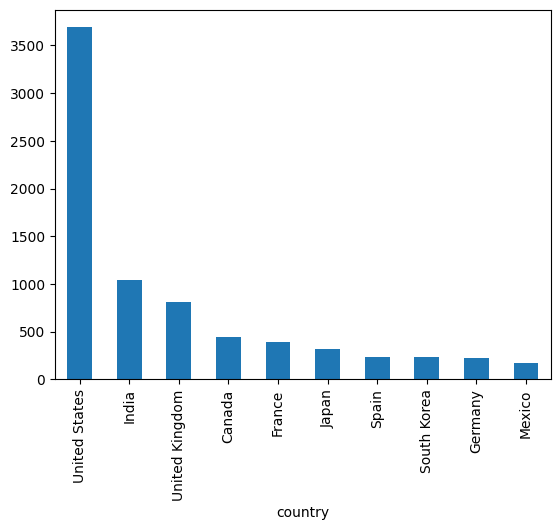

In [64]:
# Countries with highest titles

titles_by_country = netflix_titles.groupby('country').size().sort_values(ascending=False)

# plot titles_by_county
titles_by_country[:10].plot(kind='bar')
plt.show()